In [1]:
%matplotlib inline


# Advanced Plotting With Partial Dependence

The :func:`~sklearn.inspection.plot_partial_dependence` function returns a
:class:`~sklearn.inspection.PartialDependenceDisplay` object that can be used
for plotting without needing to recalculate the partial dependence. In this
example, we show how to plot partial dependence plots and how to quickly
customize the plot with the visualization API.

<div class="alert alert-info"><h4>Note</h4><p>See also `sphx_glr_auto_examples_plot_roc_curve_visualization_api.py`</p></div>


In [2]:
print(__doc__)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import plot_partial_dependence

Automatically created module for IPython interactive environment


Train models on the boston housing price dataset
================================================

First, we train a decision tree and a multi-layer perceptron on the boston
housing price dataset.



In [3]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

tree = DecisionTreeRegressor()
mlp = make_pipeline(StandardScaler(),
                    MLPRegressor(hidden_layer_sizes=(100, 100),
                                 tol=1e-2, max_iter=500, random_state=0))
tree.fit(X, y)
mlp.fit(X, y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpregressor',
                 MLPRegressor(activation='relu', alpha=0.0001,
                              batch_size='auto', beta_1=0.9, beta_2=0.999,
                              early_stopping=False, epsilon=1e-08,
                              hidden_layer_sizes=(100, 100),
                              learning_rate='constant',
                              learning_rate_init=0.001, max_fun=15000,
                              max_iter=500, momentum=0.9, n_iter_no_change=10,
                              nesterovs_momentum=True, power_t=0.5,
                              random_state=0, shuffle=True, solver='adam',
                              tol=0.01, validation_fraction=0.1, verbose=False,
                              warm_start=False))],
         verbose=False)

Plotting partial dependence for two features
============================================

We plot partial dependence curves for features "LSTAT" and "RM" for
the decision tree. With two features,
:func:`~sklearn.inspection.plot_partial_dependence` expects to plot two
curves. Here the plot function place a grid of two plots using the space
defined by `ax` .



c:\users\deepak\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:1233: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


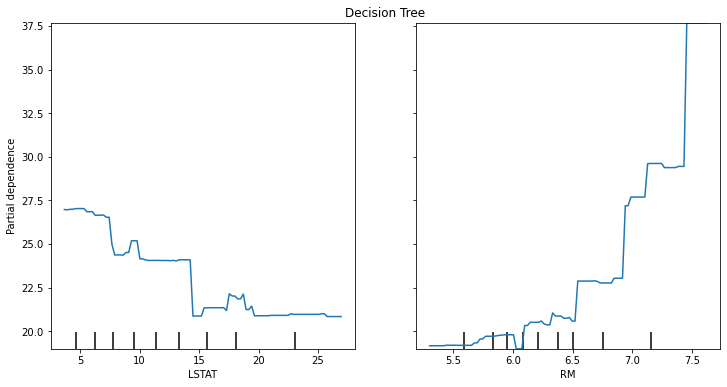

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_disp = plot_partial_dependence(tree, X, ["LSTAT", "RM"], ax=ax)

The partial depdendence curves can be plotted for the multi-layer perceptron.
In this case, `line_kw` is passed to
:func:`~sklearn.inspection.plot_partial_dependence` to change the color of
the curve.



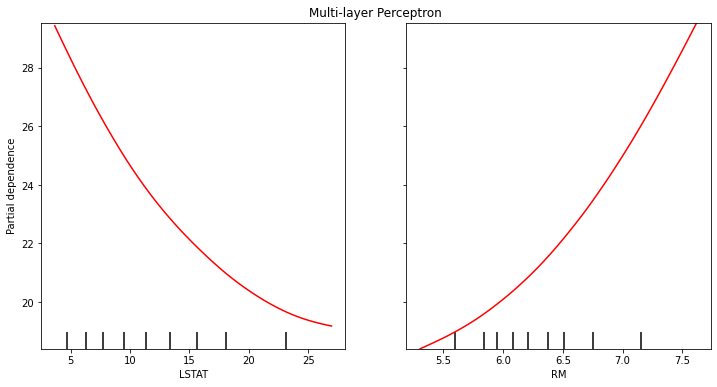

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Multi-layer Perceptron")
mlp_disp = plot_partial_dependence(mlp, X, ["LSTAT", "RM"], ax=ax,
                                   line_kw={"c": "red"})

Plotting partial dependence of the two models together
======================================================

The `tree_disp` and `mlp_disp`
:class:`~sklearn.inspection.PartialDependenceDisplay` objects contain all the
computed information needed to recreate the partial dependence curves. This
means we can easily create additional plots without needing to recompute the
curves.

One way to plot the curves is to place them in the same figure, with the
curves of each model on each row. First, we create a figure with two axes
within two rows and one column. The two axes are passed to the
:func:`~sklearn.inspection.PartialDependenceDisplay.plot` functions of
`tree_disp` and `mlp_disp`. The given axes will be used by the plotting
function to draw the partial dependence. The resulting plot places the
decision tree partial dependence curves in the first row of the
multi-layer perceptron in the second row.



Text(0.5, 1.0, 'Multi-layer Perceptron')

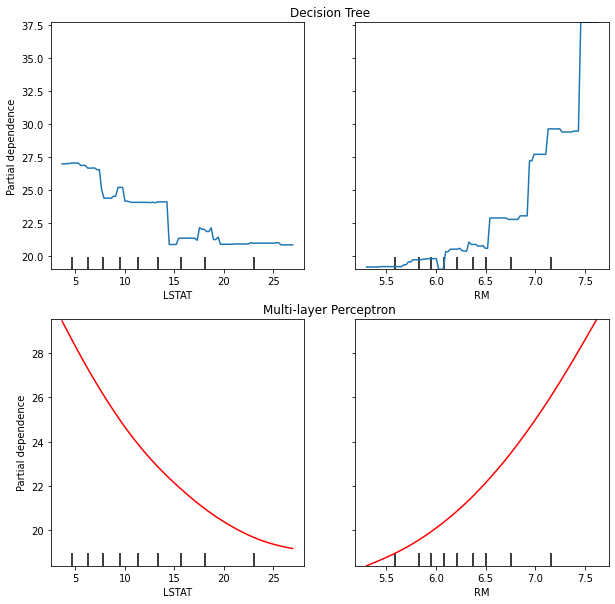

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
tree_disp.plot(ax=ax1)
ax1.set_title("Decision Tree")
mlp_disp.plot(ax=ax2, line_kw={"c": "red"})
ax2.set_title("Multi-layer Perceptron")

Another way to compare the curves is to plot them on top of each other. Here,
we create a figure with one row and two columns. The axes are passed into the
:func:`~sklearn.inspection.PartialDependenceDisplay.plot` function as a list,
which will plot the partial dependence curves of each model on the same axes.
The length of the axes list must be equal to the number of plots drawn.



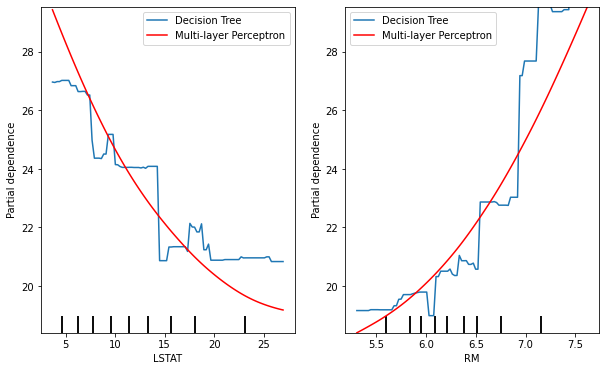

In [8]:
# Sets this image as the thumbnail for sphinx gallery
# sphinx_gallery_thumbnail_number = 4
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
tree_disp.plot(ax=[ax1, ax2], line_kw={"label": "Decision Tree"})
mlp_disp.plot(ax=[ax1, ax2], line_kw={"label": "Multi-layer Perceptron",
                                      "c": "red"})
ax1.legend()
ax2.legend()

`tree_disp.axes_` is a numpy array container the axes used to draw the
partial dependence plots. This can be passed to `mlp_disp` to have the same
affect of drawing the plots on top of each other. Furthermore, the
`mlp_disp.figure_` stores the figure, which allows for resizing the figure
after calling `plot`. In this case `tree_disp.axes_` has two dimensions, thus
`plot` will only show the y label and y ticks on the left most plot.



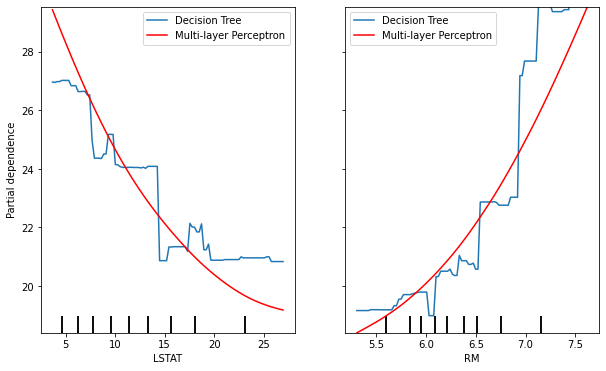

In [9]:
tree_disp.plot(line_kw={"label": "Decision Tree"})
mlp_disp.plot(line_kw={"label": "Multi-layer Perceptron", "c": "red"},
              ax=tree_disp.axes_)
tree_disp.figure_.set_size_inches(10, 6)
tree_disp.axes_[0, 0].legend()
tree_disp.axes_[0, 1].legend()
plt.show()

Plotting partial dependence for one feature
===========================================

Here, we plot the partial dependence curves for a single feature, "LSTAT", on
the same axes. In this case, `tree_disp.axes_` is passed into the second
plot function.



c:\users\deepak\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:1233: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


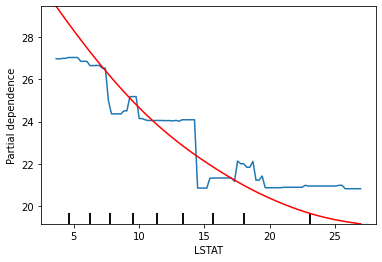

In [10]:
tree_disp = plot_partial_dependence(tree, X, ["LSTAT"])
mlp_disp = plot_partial_dependence(mlp, X, ["LSTAT"],
                                   ax=tree_disp.axes_, line_kw={"c": "red"})